In [8]:
from transformers import AutoTokenizer
import torch
import pandas as pd
import matplotlib.pyplot as plt

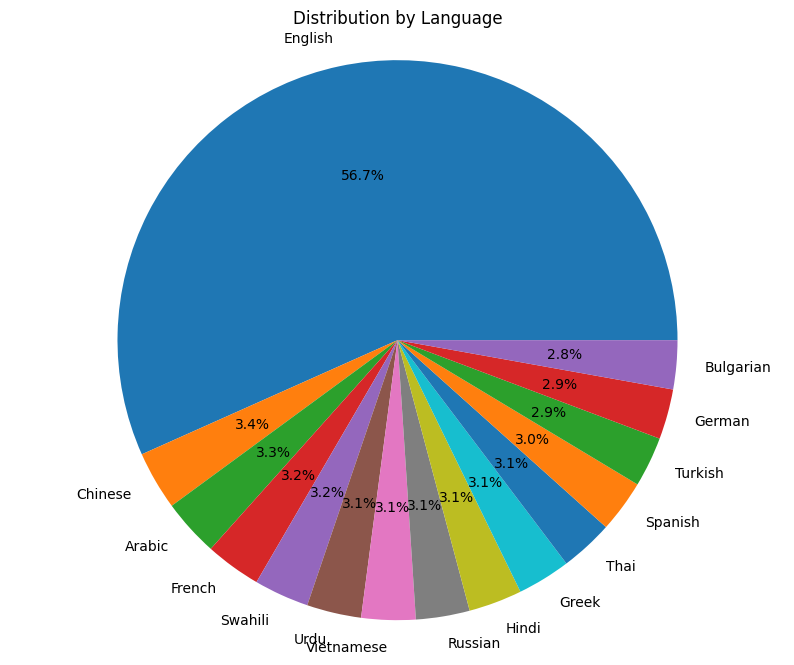

,id,premise,hypothesis,lang_abv,language,label
0,5130fd2cb5,and these comments were considered in formulat...,The rules developed in the interim were put to...,en,English,0
1,5b72532a0b,These are issues that we wrestle with in pract...,Practice groups are not permitted to work on t...,en,English,2
2,3931fbe82a,Des petites choses comme celles-là font une di...,J'essayais d'accomplir quelque chose.,fr,French,0
3,5622f0c60b,you know they can't really defend themselves l...,They can't defend themselves because of their ...,en,English,0
4,86aaa48b45,ในการเล่นบทบาทสมมุติก็เช่นกัน โอกาสที่จะได้แสด...,เด็กสามารถเห็นได้ว่าชาติพันธุ์แตกต่างกันอย่างไร,th,Thai,1
...,...,...,...,...,...,...
12115,2b78e2a914,The results of even the most well designed epi...,All studies have the same amount of uncertaint...,en,English,2
12116,7e9943d152,But there are two kinds of the pleasure of do...,But there are two kinds of the pleasure of doi...,en,English,0
12117,5085923e6c,The important thing is to realize that it's wa...,"It cannot be moved, now or ever.",en,English,2
12118,fc8e2fd1fe,At the west end is a detailed model of the who...,The model temple complex is at the east end.,en,English,2


In [9]:
df_train = pd.read_csv('train.csv')
df_test = pd.read_csv('test.csv')

language_statistics = df_train['language'].value_counts()

plt.figure(figsize=(10,8))
plt.pie(language_statistics, labels=language_statistics.index, autopct='%1.1f%%')
plt.title("Distribution by Language")
plt.axis('equal')
plt.show()

df_train

In [13]:
tokenizer = AutoTokenizer.from_pretrained("xlm-roberta-base")

train_inputs = tokenizer(
    df_train['premise'].tolist(),
    df_train['hypothesis'].tolist(),
    truncation=True,
    padding="max_length",
    max_length=512,
    return_tensors='pt',
    add_special_tokens=True
)

train_inputs['labels'] = torch.tensor(df_train['label'].tolist())
torch.save(train_inputs, 'train_data.pt')

In [14]:
test_inputs = tokenizer(
    df_test['premise'].tolist(),
    df_test['hypothesis'].tolist(),
    truncation=True,
    padding="max_length",
    max_length=512,
    return_tensors='pt',
    add_special_tokens=True
)

torch.save(test_inputs, 'test_data.pt')